# Titanic Survival Classification

With the Titanic dataset, I will continue to advance my skills in data visualization and exploratory data analysis, but through the Seaborn library, to create beautiful and informative plots that are a step beyond what I have previously done. Morever, advanced cleaning and preprocessing techniques, and a thorough understand of the kNN and Decision tree algorithms with manual implementations will provide a strong foundation for future projects. This will be my first experience dealing with missing data and categorical features.

**Main Objectives and Tasks:**
- <u>Import the data</u>
- <u>Train/Validation/Test split</u>
- <u>Cleaning the data</u>
- <u>Exploratory Data Analysis (EDA) using Seaborn</u>
- <u>Preprocess the data</u>
- <u>Build Decision Tree and kNN models.</u>
- <u>Training and Hyperparameter tuning. Use GridSearchCV and RandomizedSearchCV.</u>
- <u>Plot the Decision Tree.</u>
- <u>Plot accuracy curves for hyperparameter values.</u>
- <u>Evaluate on the test set. Use Precision, Recall, F1-Score, ROC curve and the AUC to analyze the model.</u> 


**Extra:**
- <u>Implement KNN model from scratch</u>
- Implement Decision Tree from scratch
- For CV, calculate 95% CI with np.quantile

## Import the Data

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Titanic-Dataset.csv")

## KNN Implementation

This is a manual implementation of the **K-Neartest Neighbors** (KNN) algorithm, which will include the hyperparameter that determines the amount of neighbors, k, used for the majority vote. For the distance metric, Euclidean Distance and Cosine Similarity can be used.

This algorithm finds the k closest neighbors in the training set to a data point, x, and assigns its label to the most common value among the labels of the k closest points.

To being with, find the k nearest training examples to x,

$$\{ x^{(1)}, \dots, x^{(K)} \} = \arg\min_{\substack{x^{(i)} \in \text{training set}}} \, \text{distance}(x^{(i)}, x)$$

and

$$y=\text{majority}(t^{(1)}, ..., t^{(k)})$$

Distance can be calculated using the following metrics:
- **Euclidean distance**:
$${\|x^{(a)} - x^{(b)}\|}_2=\sqrt{\sum_{j=1}^{d}(x^{(a)}_j-x^{(b)}_j)^2}$$
- **Cosine Similarity**:
$$\text{cosine}(x^{(a)}, x^{(b)})=\frac{x^{(a)}\cdot {x^{(b)}}}{\|x^{(a)}\|_2\|x^{(b)}\|_2}$$<br>

The closer the euclidean distance is to 0, the closer the points are. On the other hand, the closer the cosine similarity is to 1, the more similar the two points are. In the implementation, the cosine similarity was subtracted from 1 in order to get close points from both metrics to be values close to 0.

In [2095]:
class KNN():
    """
    This is a custom implementation of the KNN algorithm. The distance metric and the number of neighbors can both
    be specified.
    
    Parameters:
    - self.n_neighbors is the number of neighbors used in majority voting.
    - self.metric is the distance metric used by the model, either 'euclidean' or 'cosine_similarity'
    - self.X contains the features of the training set.
    - self.y contains the labels of the training set.
 
    """
    def __init__(self, n_neighbors, metric):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.X = None
        self.y = None

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            self.X = X.values
        else:
            self.X = X

        if isinstance(y, pd.Series):
            self.y = y.values
        else:
            self.y=y
             
    def predict(self, X_new):
        if isinstance(X_new, pd.DataFrame):
            X_new = X_new.values
            
        if self.metric == "euclidean":
            # Euclidean distance equation with broadcasting fixes. 
            o = np.sum(X_new**2, axis=1).reshape(-1, 1) + np.sum(self.X**2, axis=1).reshape(-1, 1).T - 2*X_new@self.X.T
        
            # clip negative values by setting them to 0, then take the square root
            distances = np.sqrt(np.maximum(o, 0))
            
        elif self.metric == "cosine_similarity":
            # Cosine Similarity metric
            o = X_new@self.X.T
            
            norm_1_squared = np.sqrt(np.sum(X_new**2, axis=1).reshape(-1, 1))
            norm_2_squared = np.sqrt(np.sum(self.X**2, axis=1).reshape(-1, 1))
            denom = np.matmul(norm_1_squared, norm_2_squared.T) 

            # The 1 - cosine similarity is used as higher values in cosine similarity represent more similar values, whereas
            # in finding the k nearest values below, the k smallest values are chosen. So by substracting this value from 1,
            # values that are closer to 0 will be considered more similar.
            distances = 1 - np.divide(o, denom)
            

        # Sort values and take k nearest
        d_sorted = np.argsort(distances, axis=1)[:, :self.n_neighbors]

        # Flatten structure
        d_flat = (d_sorted).flatten()

        # Replace values with indices
        labels = self.y[d_flat].reshape(X_new.shape[0], self.n_neighbors)

        # Get the most common class for each row, and use that as the prediction
        preds = np.array([np.bincount(i).argmax() for i in labels])
        
        return preds

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [896]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Data Cleaning

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is a binary classification task whose objective is to predict whether a passenger survived (1) or did not (0), so the 'Survived' column is the target and the rest of the columns are the features.

Moreover, in the dataset we can notice that there are three categorical features, 'Sex', 'Embarked, and 'Pclass'. From these features, 'Embarked' indicates the port the passenger embarked on, and 'Pclass' the type of ticket they purchased (1st, 2nd, or 3rd class). These can be one-hot encoded as dummy variables. Moreover, Cabin appears to contain a lot of missing values, which might require some form of imputation or dropping columns. Before deciding this, it's important to see how many missing values each column has. 

Lastly, the 'Cabin' section contains the deck level indicated by the level and the number referring to the cabin number. Deck level has the potential to be a great indicator of the survival chances of the passengers, and often reflected socioeconomic status.

In [10]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000
mean,444.405899,2.308989,29.807687,0.492978,0.390449,31.819826
std,257.465527,0.833563,14.485211,1.060720,0.838134,48.059104
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,439.500000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,667.250000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


Most columns around 0-2 values, and yet 'Age' is missing 137 entries and 'Cabin' an astonishing 552 entries. Neither of these predictors can be discarded, as age will likely be an important predictor of survival, especially for infants, young, and elderly passengers, while cabin indicates the level at which the passenger was lodged, and is therefore also important. 

In [13]:
X_train.isna().sum().sort_values()

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            137
Cabin          552
dtype: int64

To sort out the missing values in the age column, the mean will be used.

In [15]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="mean")
X_train_num = np.round(num_imputer.fit_transform(X_train[['Age']]), 1)
X_test_num = np.round(num_imputer.transform(X_test[['Age']]), 1)

To deal with categorical values that are missing (in Embarked), the mode will be used. Moreover, a new feature will be created, Deck, which extracts the first element from the Cabin column, with missing values filled in with "Missing" as there are way too many missing values. Afterwards, 'Cabin' will be dropped.

In [17]:
# Extracts the first element, while preserving missing values.
X_train['Deck'] = X_train['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else np.nan)
X_test['Deck'] = X_test['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else np.nan)

# Discard the Cabin column
X_train = X_train.drop('Cabin', axis=1)
X_test = X_test.drop('Cabin', axis=1)

In [18]:
# Impute the mode
mode_imputer = SimpleImputer(strategy="most_frequent")

X_train_cat = mode_imputer.fit_transform(X_train[['Embarked']])
X_test_cat = mode_imputer.transform(X_test[['Embarked']])

In [19]:
# Drop the former columns
X_train = X_train.drop(['Embarked', 'Age'], axis=1)

In [20]:
X_test = X_test.drop(['Embarked', 'Age'], axis=1)

In [21]:
# Replace NaNs with Missing for Deck
X_train = X_train.fillna("Missing")
X_test = X_test.fillna("Missing")

In [22]:
# Add transformed columns
X_train_transformed_features = np.append(X_train_cat, X_train_num, axis=1)
X_test_transformed_features = np.append(X_test_cat, X_test_num, axis=1)

In [23]:
X_train_transformed_df = pd.DataFrame(X_train_transformed_features, columns=["Embarked", "Age"])
X_test_transformed_df = pd.DataFrame(X_test_transformed_features, columns=["Embarked", "Age"])

In [24]:
X_train_new = pd.concat([X_train.reset_index(drop=True), X_train_transformed_df.reset_index(drop=True)], axis=1)
X_test_new = pd.concat([X_test.reset_index(drop=True), X_test_transformed_df.reset_index(drop=True)], axis=1)

In [25]:
X_train_new.isna().sum().sort_values()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Deck           0
Embarked       0
Age            0
dtype: int64

In [26]:
X_test_new.isna().sum().sort_values()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Deck           0
Embarked       0
Age            0
dtype: int64

The new training and test data have lost all their remaining missing values through imputation. The next step is to discard any columns that are irrelevant to the training process.

In [28]:
X_train_new.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Deck,Embarked,Age
0,693,3,"Lam, Mr. Ali",male,0,0,1601,56.4958,Missing,S,29.8
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,0,0,239854,0.0000,Missing,S,29.8
2,528,1,"Farthing, Mr. John",male,0,0,PC 17483,221.7792,C,S,29.8
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,0,1,392091,9.3500,Missing,S,18.0
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,1,1,C.A. 31921,26.2500,Missing,S,31.0


PassengerId, Name, and Ticket (which stands for the ticket number) can be dropped as they do not contribute to the survival of a passenger.

In [30]:
X_train_cleaned = X_train_new.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
X_test_cleaned = X_test_new.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [31]:
X_train_cleaned.head()

,Pclass,Sex,SibSp,Parch,Fare,Deck,Embarked,Age
0,3,male,0,0,56.4958,Missing,S,29.8
1,2,male,0,0,0.0000,Missing,S,29.8
2,1,male,0,0,221.7792,C,S,29.8
3,3,female,0,1,9.3500,Missing,S,18.0
4,2,female,1,1,26.2500,Missing,S,31.0


## Exploratory Data Analysis 

<Axes: xlabel='Age', ylabel='Count'>

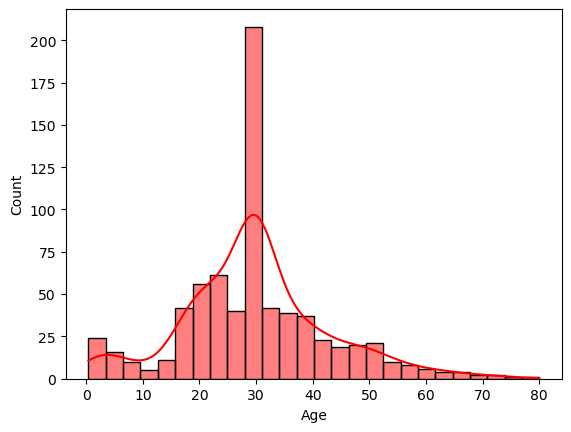

In [1748]:
# Plot a histogram to get an idea of the visual distribution of the passengers.
sns.histplot(X_train_cleaned['Age'], kde=True, color="red")

The passenger distribution appears to be mostly people aged around 30 as the mean (29.8) was used for imputation to take care of the missing data.

<Axes: xlabel='Fare', ylabel='Count'>

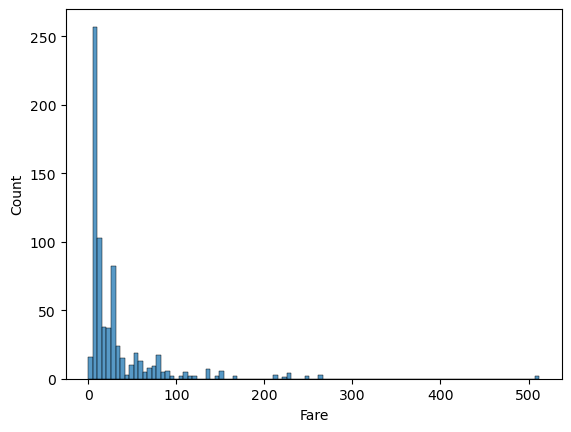

In [35]:
sns.histplot(X_train_cleaned["Fare"])

The ticket fare appears to be overly-skewed, and should be adjusted during the data preprocessing step.

In [37]:
# For plotting reasons combining X_train_final and y_train into one df
combined_data = pd.concat([X_train_cleaned.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

Categorical plots of the data will now be conducted.

[]

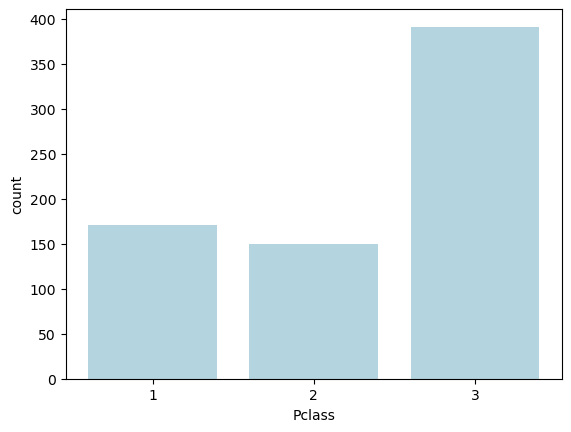

In [1613]:
# Check the influence of main categories on the Survival rate.
sns.countplot(X_train_cleaned, x="Pclass", color="lightblue")
plt.plot()

Looking at the distribution of ticket classes, it is evident that there is a striking difference in socioeconomic status among passengers, witih the vast majority being coming from underprivileged socioeconomic circumstances.

Now, to take a look at the influence sex may have on the survival rate of passengers.

[]

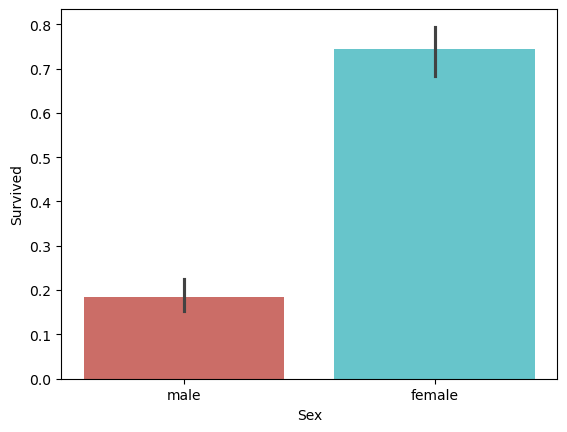

In [1746]:
sns.barplot(combined_data, x="Sex", y="Survived", hue="Sex", palette="hls")
plt.plot()

It's pretty clear that sex will be a major predictor for survival, given the proportion of women who survived in comparison to men.

This is further reinforced when the number of women and men on the ship is considered.

In [1735]:
value, counts = np.unique(combined_data["Sex"].values, return_counts=True)
print("The number of men on the Titanic is {0}.".format(counts[1]))
print("The number of women on the Titanic is {0}.".format(counts[0]))

The number of men on the Titanic is 459.
The number of women on the Titanic is 253.


Men outnumber women on the training data almost two-to-one. Given that the split was stratified, we can conclude this reflects the proportion of the entire dataset.

[]

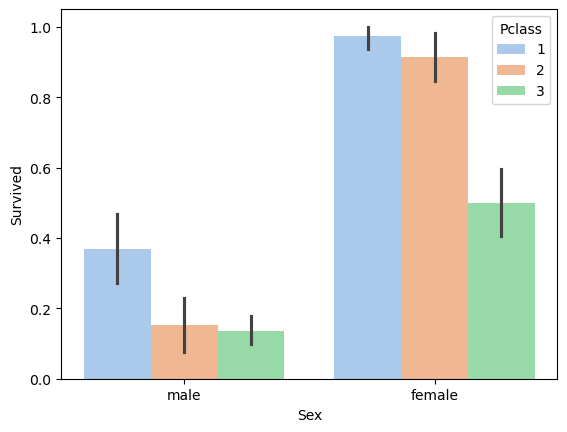

In [1694]:
sns.barplot(combined_data, x="Sex", y="Survived", hue="Pclass", palette="pastel")
plt.plot()

Two conclusions can be drawn from this graph. Firstly, that upper-class individuals had a much higher chance of surviving the Titanic in comparison with people from poor socioeconomic backgrounds. Secondly, that that women from higher-class backgrounds had a significantly higher probability of surviving than women from the poorest category on the ship and their male counterparts of all socioeconomic backgrounds.

Now, let's look at the port at which the passengers embarked.

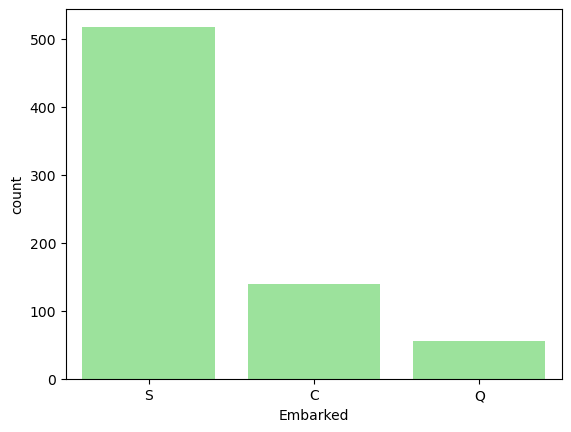

In [1767]:
sns.countplot(X_train_cleaned, x="Embarked", color="lightgreen")
plt.show()

The vast majority embarked at Southampton, UK, while less embarked at Cherbourg, France, and the smallest amount at Queenstown, Ireland.

It might be worthwhile to check if there is any relation of the ports with socioeconomic background.

<Axes: xlabel='Embarked', ylabel='count'>

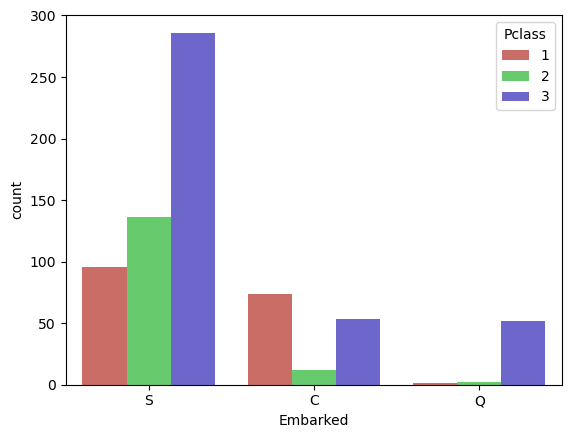

In [1765]:
palette = sns.color_palette("hls", 3)
sns.countplot(X_train_cleaned, x="Embarked", hue="Pclass", palette=palette)

Given the proportions of ticket classes at each port, embarking at Queenstown could be a good indicator of lower socioeconomic status and hence a lower probability of survival, while Charbourg would indicate a greater chance of surviving given that the vast majority of people who embarked there were 1st class ticket holders.

It is likely that this distribution reflects the historical realities of the time period. Ireland was suffering from significant poverty, which explains why those who embarked at Queenstown were all third-class passengers. On the other hand, Charbourg, France, would have been the destination of all the wealthiest passengers from accross Europe who wanted to embark on the Titanic. 

Let's take a look at age now.

<Axes: xlabel='Survived', ylabel='Age'>

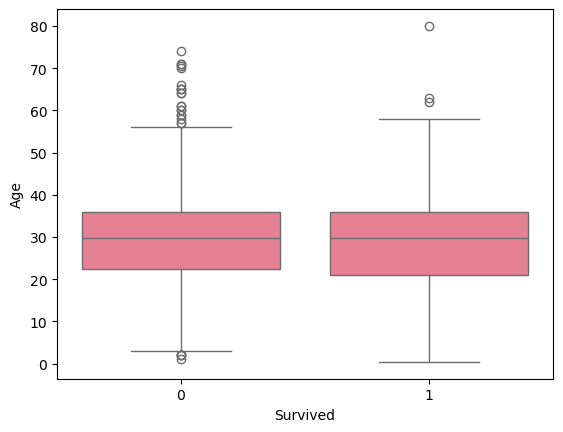

In [1786]:
sns.boxplot(combined_data, x="Survived", y="Age")

Surprisingly, it does not look like age had much of an effect on survival. Although this could result from so many age values were missing and the rest were imputed by the mean of the existing ones.

## Data Preprocessing

One-hot encode the categorical variables, scale the numerical ones, and transform any skewed ones.

In [41]:
from sklearn.preprocessing import OneHotEncoder

categorical_feature_names = ["Sex", "Embarked", "Deck"]
ohe = OneHotEncoder(sparse_output=False)
one_hot_encoded_train = ohe.fit_transform(X_train_cleaned[categorical_feature_names])
one_hot_encoded_test = ohe.transform(X_test_cleaned[categorical_feature_names])

In [42]:
ohe_df_train = pd.DataFrame(one_hot_encoded_train, columns=ohe.get_feature_names_out(categorical_feature_names))
ohe_df_test = pd.DataFrame(one_hot_encoded_test, columns=ohe.get_feature_names_out(categorical_feature_names))

In [43]:
# Drop redundant columns
X_train_dropped = X_train_cleaned.drop(categorical_feature_names, axis=1)
X_test_dropped = X_test_cleaned.drop(categorical_feature_names, axis=1)

In [44]:
X_train_ohe = pd.concat([X_train_dropped, ohe_df_train], axis=1)
X_test_ohe = pd.concat([X_test_dropped, ohe_df_test], axis=1)

In [45]:
X_train_ohe.head()

,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Missing,Deck_T
0,3,0,0,56.4958,29.8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,0,0.0000,29.8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,221.7792,29.8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,1,9.3500,18.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,1,1,26.2500,31.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# Transform the skewed feature, i.e. Fare
X_train_ohe["Fare"] = np.log1p(X_train_ohe["Fare"])
X_test_ohe["Fare"] = np.log1p(X_test_ohe["Fare"])

In [47]:
# Scale the the numerical values (Age, Fare, and Parch, and SibSp)
from sklearn.preprocessing import StandardScaler

numerical_feature_names = ["Age", "Fare", "Parch", "SibSp"]
standard_scaler = StandardScaler()
scaled_train = standard_scaler.fit_transform(X_train_ohe[numerical_feature_names])
scaled_test = standard_scaler.transform(X_test_ohe[numerical_feature_names])

In [48]:
scaled_df_train = pd.DataFrame(scaled_train, columns=standard_scaler.get_feature_names_out(numerical_feature_names))
scaled_df_test = pd.DataFrame(scaled_test, columns=standard_scaler.get_feature_names_out(numerical_feature_names))

In [49]:
scaled_df_train.head()

,Age,Fare,Parch,SibSp
0,-0.000475,1.124592,-0.466183,-0.465084
1,-0.000475,-3.014278,-0.466183,-0.465084
2,-0.000475,2.508198,-0.466183,-0.465084
3,-0.907751,-0.627019,0.727782,-0.465084
4,0.091790,0.361872,0.727782,0.478335


In [50]:
# Drop unscaled columns
X_train_unscaled_dropped = X_train_ohe.drop(numerical_feature_names, axis=1)
X_test_unscaled_dropped = X_test_ohe.drop(numerical_feature_names, axis=1)

In [51]:
X_train_done = pd.concat([scaled_df_train, X_train_unscaled_dropped], axis=1)
X_test_done = pd.concat([scaled_df_test, X_test_unscaled_dropped], axis=1)

In [52]:
X_train_done.head()

,Age,Fare,Parch,SibSp,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Missing,Deck_T
0,-0.000475,1.124592,-0.466183,-0.465084,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.000475,-3.014278,-0.466183,-0.465084,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.000475,2.508198,-0.466183,-0.465084,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.907751,-0.627019,0.727782,-0.465084,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.091790,0.361872,0.727782,0.478335,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Building the Models

The models that are going to be used for this binary classification task are a Decision Tree Classifier and a kNN model.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

kNN = KNeighborsClassifier(n_neighbors=7)
Tree_Classifier = DecisionTreeClassifier(max_depth=5, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features=None,
                                        max_leaf_nodes=None)

## Hyperparameter Tuning

Instead of calling .fit() on the model, a RandomizedSearchCV will go through random parameter combinations of the Decision Tree Classifier on the dataset, while a GridSearchCV will go through the best parameters for the kNN model. The best scores and parameters will be extracted.

In [56]:
# For the cross-validation parameter in GridSearchCV and RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [898]:
# GridSearchCV for kNN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}

grid_search_knn = GridSearchCV(kNN, param_grid=param_grid_knn, cv=kf, scoring="accuracy", error_score="raise")
grid_search_knn.fit(X_train_done, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise', estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
             scoring='accuracy')

In [1173]:
grid_search_knn.best_params_

{'n_neighbors': 13}

In [1226]:
grid_search_knn.best_score_*100

81.46296493280857

The best KNN model achieves an accuracy of 81.46% and uses k=13 as its number of neighbors.

In [1236]:
param_grid_decision_tree = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_leaf_nodes": [None, 10, 20, 50, 100],
    "max_features": ['log2', 'sqrt', None],
    "criterion": ["gini", "entropy"]
}

randomized_search_decision_tree = RandomizedSearchCV(Tree_Classifier, param_distributions=param_grid_decision_tree, cv=kf, scoring="accuracy", random_state=42)
randomized_search_decision_tree.fit(X_train_done, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(max_depth=5),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'max_leaf_nodes': [None, 10, 20, 50,
                                                           100],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20]},
                   random_state=42, scoring='accuracy')

In [1238]:
randomized_search_decision_tree.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 20,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'entropy'}

In [1240]:
randomized_search_decision_tree.best_score_*100

81.46119207176542

The best decision tree has an accuracy of 81.46% and the following hyperparameters:
- min_samples_split = 10
- min_samples_leaf = 2
- max_leaf_nodes = 20
- max_features = None
- max_depth = 10
- criterion = entropy

## Evaluation

In [1198]:
# Rebuld KNN model with best parameters from hyperparameter tuning and evaluate their performance
KNN_best = KNeighborsClassifier(n_neighbors=13)
KNN_best.fit(X_train_done, y_train)
scores = KNN_best.score(X_test_done, y_test)

In [1208]:
scores*100

77.6536312849162

In [1243]:
# Do the same for the Decision Tree model
Decision_Tree_best = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=1, max_leaf_nodes=100, max_features=None,
                                            max_depth=10, criterion='entropy')
Decision_Tree_best.fit(X_train_done, y_train)
scores = Decision_Tree_best.score(X_test_done, y_test)

In [1245]:
scores*100

77.09497206703911

The KNN model slightly outperforms the Decision Tree by attaining an accuracy of 77.65% in comparison with the tree-based model's 77.09%.

As a consequence, the final model chosen for this dataset will be the fine-tuned KNN model.

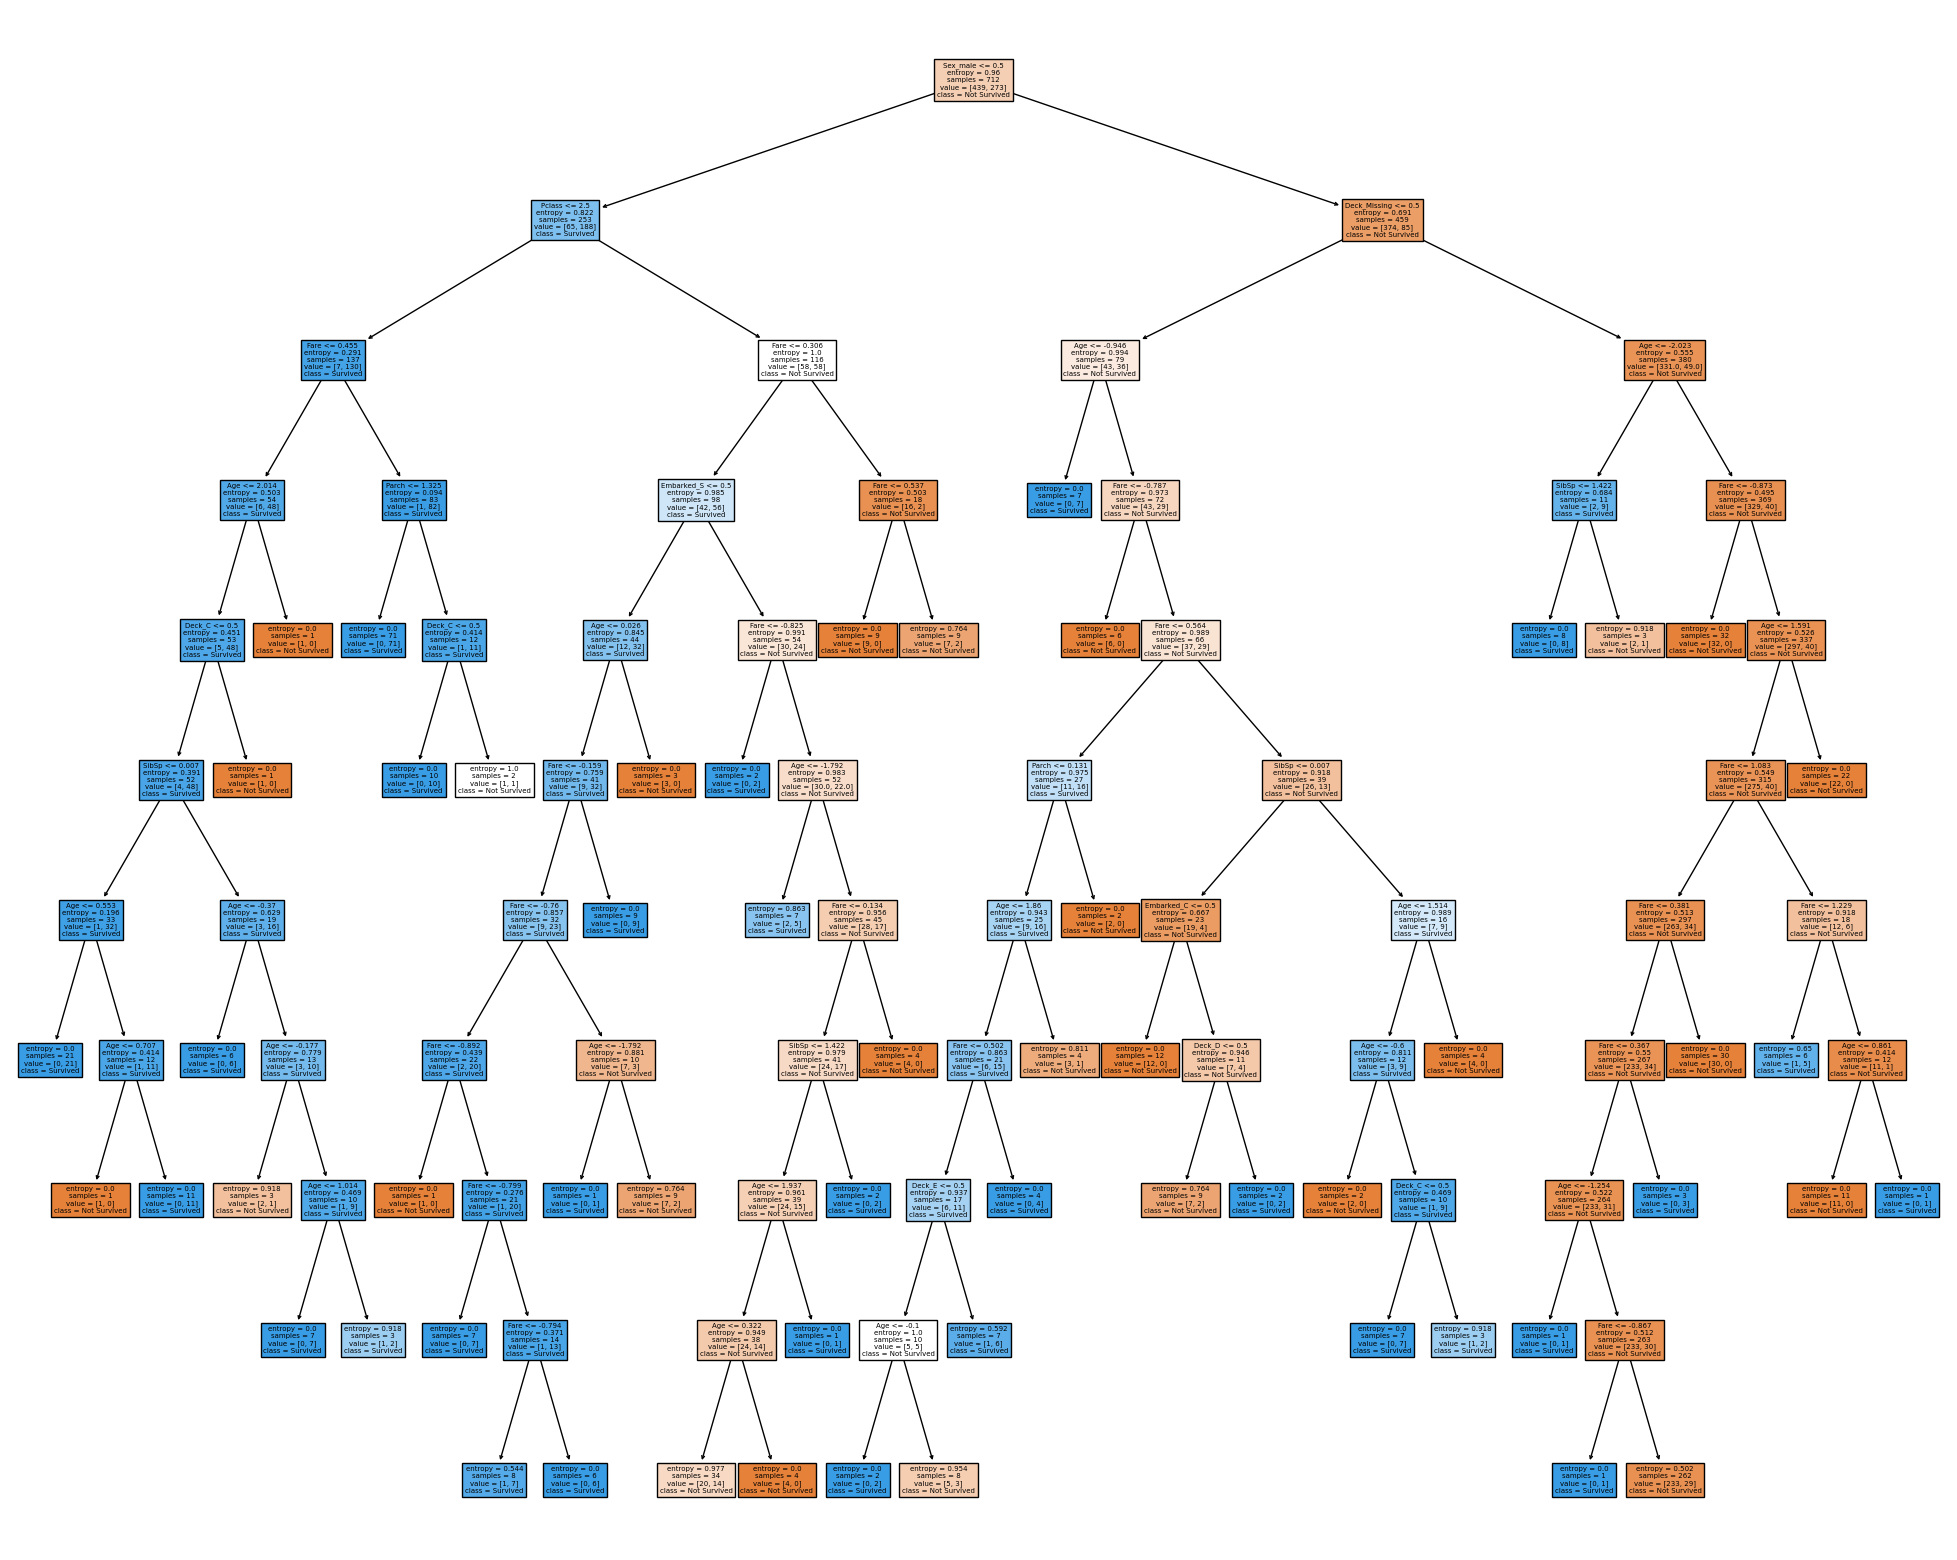

In [1487]:
# Visualize the decision tree
fig = plt.figure(figsize=(25, 20))

_ = tree.plot_tree(Decision_Tree_best,
                                 feature_names=list(X_train_done.columns.values),
                                 class_names=["Not Survived", "Survived"],
                                 filled=True)                            

In [1566]:
## Futher Metrics
from sklearn.metrics import confusion_matrix

best_preds = KNN_best.predict(X_test_done)
confusion_matrix(y_test, best_preds)

array([[91, 19],
       [21, 48]])

Analyzing the confusion matrix, the number of false negatives is slightly higher than the number of false positives. This indicates that the model is more often wrong by failing to identify survivors, than it is by failing to identify those who have died. Although this gap between the types  of errors is very small.

In [1569]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision = precision_score(y_test, best_preds, average="macro")
f1 = f1_score(y_test, best_preds, average="macro")
recall = recall_score(y_test, best_preds, average="macro")

In [1571]:
print("Precision: {0}, Recall: {1}, and F1-Score: {2}".format(precision, recall, f1))

Precision: 0.7644589552238805, Recall: 0.7614624505928853, and F1-Score: 0.7628510863804981


Using the precision, we can conclude that the model, of all predicted positives, got 76.44% correct. Moreover, the recall indicates that the model correctly identified 76.15% of all positives. The negligible gap between recall and precision suggests a balanced model that does not favor false positives or false negatives, with a good trade-off between the two errors.

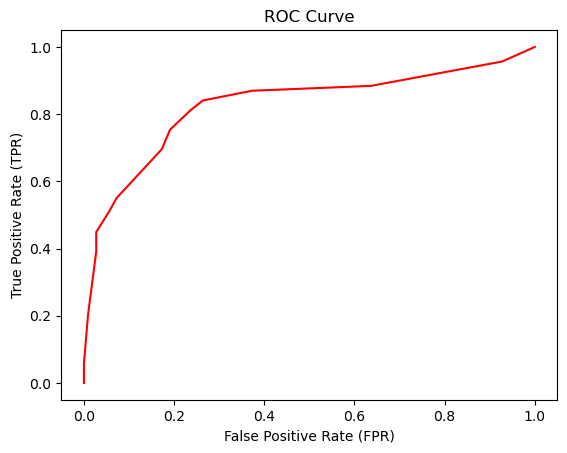

In [1574]:
from sklearn.metrics import roc_curve

prediction_probs = KNN_best.predict_proba(X_test_done)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prediction_probs, pos_label=1)
plt.plot(fpr, tpr, color="red")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

In [1576]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, prediction_probs, average='macro')
auc

0.826152832674572

Given the AUC of 0.826, it can be concluded that model is moderately accurate. For reference, an AUC of 0.5 would be equivalent to random guessing.

## Testing the KNN Implementation

In [1442]:
model = KNN(n_neighbors=1, metric='cosine_similarity')
model.fit(X_train_done, y_train)
preds = model.predict(X_test_done)

In [1444]:
from sklearn.metrics import accuracy_score

k = range(1, 20)
X_train_imp, X_val_imp, y_train_imp, y_val_imp = train_test_split(X_train_done, y_train, train_size=0.75, test_size=0.25, shuffle=True, random_state=42, stratify=y_train)
y_train_imp = y_train_imp.reset_index(drop=True)
y_val_imp = y_val_imp.reset_index(drop=True)

accuracies_euclidean = []
models_euclidean = []

for i in k:
    models_euclidean.append(KNN(n_neighbors=i, metric='euclidean'))
    models_euclidean[i-1].fit(X_train_imp, y_train_imp)
    preds_k = models_euclidean[i-1].predict(X_val_imp)
    accuracy = accuracy_score(y_val_imp, preds_k)
    accuracies_euclidean.append(accuracy)

accuracies_cosine = []
models_cosine = []

for i in k:
    models_cosine.append(KNN(n_neighbors=i, metric='cosine_similarity'))
    models_cosine[i-1].fit(X_train_imp, y_train_imp)
    preds_k = models_cosine[i-1].predict(X_val_imp)
    accuracy = accuracy_score(y_val_imp, preds_k)
    accuracies_cosine.append(accuracy)

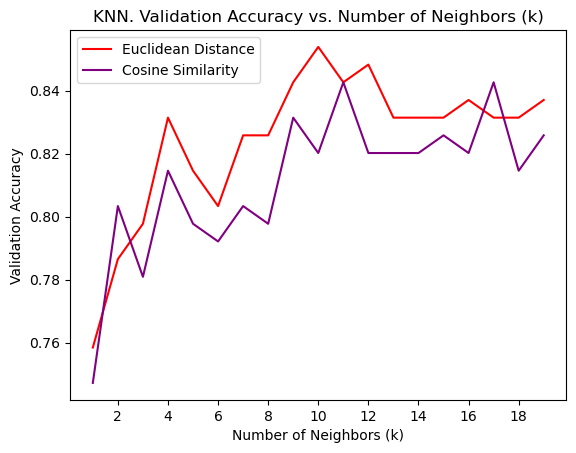

In [1462]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.plot(k, accuracies_euclidean, color="red", label="Euclidean Distance")
plt.plot(k, accuracies_cosine, color="purple", label="Cosine Similarity")
plt.title("KNN. Validation Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.legend()
ax = plt.gca() 
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

Based on the graph, the highest validation accuracy occurs when k=9. Moreover, Euclidean Distance seems to outperform Cosine Similarity as a distance metric quite consistently.

In [1403]:
# Get highest and best accuracy models with euclidean and cosine similarity
highest_accuracy_euclidean = np.max(accuracies_euclidean)
highest_accuracy_cosine = np.max(accuracies_cosine)

In [1405]:
highest_accuracy_euclidean*100, highest_accuracy_cosine*100

(85.39325842696628, 85.39325842696628)

In [1411]:
highest_accuracy_k_euclidean = np.argmax(accuracies_euclidean)
highest_accuracy_k_cosine = np.argmax(accuracies_cosine)
highest_accuracy_k_euclidean, highest_accuracy_k_cosine

(9, 9)

The best performing KNN model had a k=9 and attained an validation accuracy of 85.39%, let's evaluate this on the test set.

In [1315]:
best_model_knn = models[9]
best_preds_knn = best_model_knn.predict(X_test_done)
test_accuracy = accuracy_score(y_test, best_preds_knn)
test_accuracy

0.776536312849162

The final test accuracy of the KNN model is 77.65%, which suggests that there may be some degree of overfitting in the model.

## Decision Tree Implementation

This is a manual implementation of the Decision Tree algorithm.

The algorithm will be implemented with several hyperparameters for tuning, including the gini and entropy criterions. Pruning Techniques will also be implemented, but have yet to be determined.

In [2006]:
class DecisionTree():
    """
    This is a customer implementation of a Decision Tree model for a classification task. There are
    several hyperparameters and tuning options that a user can specify at the outset.
    
    Parameters:
    - self.criterion is used to measure the quality of the split, essential for training, either 'gini' or 'entropy'.
    - self.max_depth is the maximum depth of the tree.
    - self.min_samples_split is the minimum number of samples to split an internal node.
    - self.min_samples_leaf is the mimumum requisite number of samples at a leaf.
    - self.max_features is the maximum number of features to be considered when looking at a split, None, int, 'sqrt', or 'log2'

    Entropy tends to produce more balanced trees. Gini impurity tends to isolate the most frequent class in its own branch.

    Note: Assumes categorical data has been one-hot encoded.
    """
    def __init__(self, criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, max_features=None, random_state=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_leaf_nodes = max_leaf_nodes
        self.max_features = max_features
        self.random_state = random_state
        self.tree = {}

    def fit(self, X, y):
        np.random.seed(self.random_state)
        # Convert all pandas DataFrames to Numpy Arrays
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        splits = []
        for i in range(X.shape[1]):
            # Check if data is categorical or numerical, calculate a split on it.
            # Data is categorical (one-hot encoded) and so has either one of two values.
            unique_values = list(set(X[:, i]))

            if len(unique_values) == 2:
                thresholds = [np.mean(list(unique_values))]
                splits.append(self.binary_split(X, y, i, thresholds))
                
            else:
                thresholds = np.quantile(unique_values, q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
                splits.append(self.binary_split(X, y, i, thresholds))

        print(splits)
                

    def create_internal_node(self, feature, threshold, left, right):
        return {"feature": feature, "threshold": threshold, "left": left, "right": right}

    def create_leaf_node(self, cls):
        return {"cls": cls}
                
    def binary_split(self, X, y, i, thresholds):
        best_CART = 1e6
        # Assuming Gini Impurity
        for threshold in thresholds:
            X_left = X[X <= threshold]
            X_right = X[X > threshold]
            print(X_left.shape)
            print(X_right.shape)
            y_left = y[(X <= threshold)]
            y_right = y[X > threshold]
            
            m_left = len(X_left)
            m_right = len(X_right)
            m = len(X)
            # Terminate if split is perfect. If num_right = 0 or num_left = 0, perfect split indicates no more depth
            # If not perfect or cost function not small enough, keep splitting.
            impurity_right = self.gini(X_right, y_right)
            impurity_left = self.gini(X_left, y_left)
            cart_cost = (m_left / m)*impurity_left + (m_right/m)*impurity_right

            if cart_cost <= best_CART:
                best_CART = cart_cost
                best_threshold = threshold
                best_feature = i

        return [best_CART, best_threshold, best_feature]

    def gini(self, X, y):
        ## Get ratios. 
        value, counts = np.unique(y, return_counts=True)
        p = counts / X.shape[0] # where X.shape[0] is the total number of instances in the split

        # return the gini criterion value
        g = 1 - np.sum(p**2)
        return g


    def entropy(self, X, y):
        # Get ratios
        value, counts = np.unique(y, return_counts=True)
        p = counts / X.shape[0]

        # return the entropy
        H = - np.sum(p*np.log2(p))
        return H
             
    def predict(self, X_new):
        pass


In [2008]:
model_2 = DecisionTree(criterion="gini", max_depth=3, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, max_features=None, random_state=42)
model_2.fit(X_train_done, y_train)
preds_2 = model_2.predict(X_test_done)

(51,)
(13477,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [2001]:
preds_2